In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Файл содержит данные о сумме выручки по каждом киоске (тыс. руб. в сутки). Данные собраны в 6 столбцов: City1Bef, City1Aft, City2Bef, City2Aft, City3Bef, City3Aft. Размер выручки измерялся до начала рекламной кампании и через 7 дней после неё.


City1Bef, City1Aft — сумма выручки в первом городе до начала рекламной кампании и через 7 дней после неё соответственно;

City2Bef, City2Aft — сумма выручки во втором городе до начала рекламной кампании и через 7 дней после неё соответственно;

City3Bef, City3Aft — сумма выручки в третьем городе до начала рекламной кампании и через 7 дней после неё соответственно.

In [3]:
df = pd.read_csv("task1ice.csv",sep=",")
df.head(5 )

,Unnamed: 0,City1Bef,City1Aft,City2Bef,City2Aft,City3Bef,City3Aft
0,0,136,126,114,121,136,127
1,1,114,138,128,137,136,105
2,2,115,124,131,122,113,134
3,3,109,150,139,127,126,126
4,4,129,117,123,117,127,114


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  200 non-null    int64
 1   City1Bef    200 non-null    int64
 2   City1Aft    200 non-null    int64
 3   City2Bef    200 non-null    int64
 4   City2Aft    200 non-null    int64
 5   City3Bef    200 non-null    int64
 6   City3Aft    200 non-null    int64
dtypes: int64(7)
memory usage: 11.1 KB


In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.describe()

,City1Bef,City1Aft,City2Bef,City2Aft,City3Bef,City3Aft
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,121.060000,129.965000,127.985000,131.195000,128.745000,128.620000
std,9.101681,10.366828,10.454245,9.944417,9.110708,10.053905
min,96.000000,102.000000,102.000000,104.000000,97.000000,104.000000
25%,115.750000,123.000000,121.000000,125.000000,123.750000,122.000000
50%,121.000000,129.000000,128.000000,132.000000,129.000000,128.500000
75%,127.000000,137.000000,135.250000,139.000000,134.000000,135.000000
max,145.000000,160.000000,167.000000,165.000000,152.000000,155.000000


На уровне значимости 0.05 проверьте, есть ли статистически значимая разница средней выручки в первом и втором городах до начала рекламной кампании.

 Найдите описательные статистики для выручки, постройте гистограмму и график «ящик с усами».

In [11]:
# Предполагаем, что у вас есть две серии (city1 и city2), содержащие данные о выручке
city1 = df.City1Bef
city2 = df.City1Aft

# Выполним тест Шапиро-Уилка для проверки нормальности распределения
stat_city1, p_city1 = stats.shapiro(city1)
stat_city2, p_city2 = stats.shapiro(city2)

# Установим уровень значимости
alpha = 0.05

# Проверим p-значения по отношению к уровню значимости
if p_city1 > alpha:
    print("Данные для города 1 имеют нормальное распределение (не отвергаем H0)")
else:
    print("Данные для города 1 не имеют нормального распределения (отвергаем H0)")

if p_city2 > alpha:
    print("Данные для города 2 имеют нормальное распределение (не отвергаем H0)")
else:
    print("Данные для города 2 не имеют нормального распределения (отвергаем H0)")

Данные для города 1 имеют нормальное распределение (не отвергаем H0)
Данные для города 2 имеют нормальное распределение (не отвергаем H0)


In [ ]:
# Create a pandas DataFrame with your data
data = {'City2Bef':df.City2Bef, 'City2Aft':df.City2Aft }
df_1 = pd.DataFrame(data)

Данные следуют нормальному распределению (p = 0.1001)


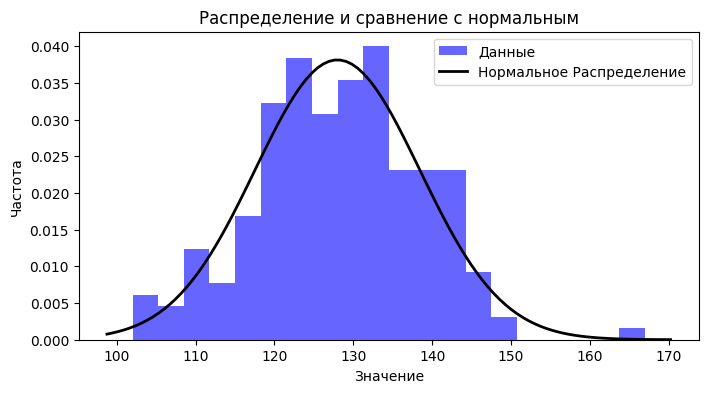

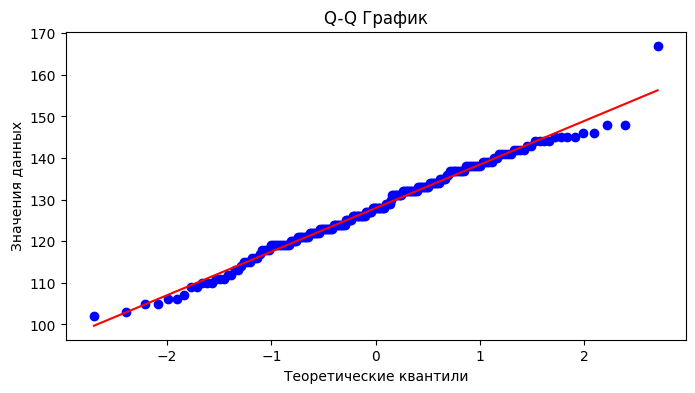

In [17]:
# Определим функцию для проверки нормальности и построения распределения и Q-Q графика
def check_normality_and_plot(data_series, alpha=0.05):
    # Тест Шапиро-Уилка на нормальность
    stat, p = stats.shapiro(data_series)

    # Проверка, следует ли данным нормальное распределение
    if p > alpha:
        print("Данные следуют нормальному распределению (p = {:.4f})".format(p))
    else:
        print("Данные не следуют нормальному распределению (p = {:.4f})".format(p))

    # Построение гистограммы
    plt.figure(figsize=(8, 4))
    plt.hist(data_series, bins=20, density=True, alpha=0.6, color='b', label='Данные')

    # Построение нормального распределения для сравнения
    mu, sigma = data_series.mean(), data_series.std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, p, 'k', linewidth=2, label='Нормальное Распределение')

    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.legend()
    plt.title('Распределение и сравнение с нормальным')
    plt.show()

    # Построение Q-Q графика
    plt.figure(figsize=(8, 4))
    stats.probplot(data_series, dist="norm", plot=plt)
    plt.title("Q-Q График")
    plt.xlabel("Теоретические квантили")
    plt.ylabel("Значения данных")
    plt.show()

# Пример использования для Город1_До
check_normality_and_plot(df['City2Bef'])

Данные следуют нормальному распределению (p = 0.3508)


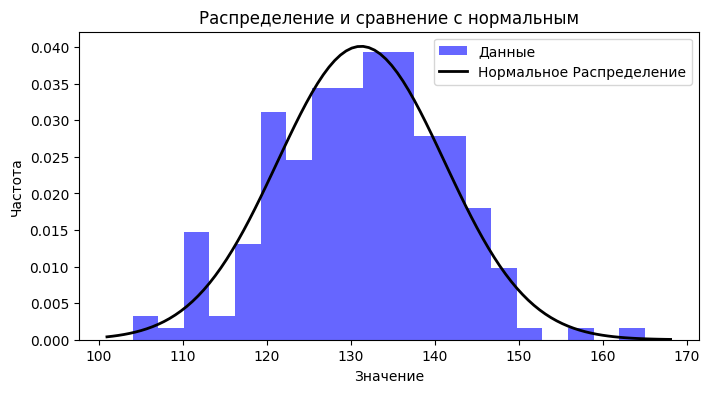

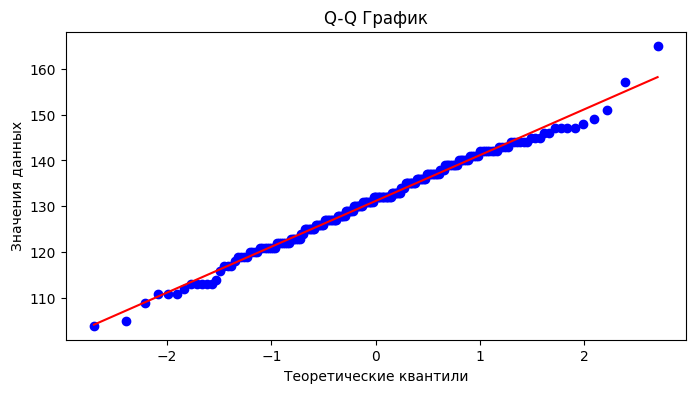

In [18]:
check_normality_and_plot(df['City2Aft'])

Формальная постановка задачи:

 Проверить, существует ли статистически значимая разница в средней выручке между первым и вторым городами до начала рекламной кампании.

Статистический критерий: Для проверки этой задачи можно воспользоваться t-критерием Стьюдента для независимых выборок. Так как у нас есть два города (city1 и city2), и мы хотим сравнить средние значения, этот критерий подходит для нашей задачи.

Требования к данным:

Нормальность распределения: Перед использованием t-критерия Стьюдента необходимо проверить, что данные в каждом из городов имеют нормальное распределение. Мы можем использовать, например, тест Шапиро-Уилка для этой цели. Если данные не имеют нормального распределения, мы должны рассмотреть альтернативные методы.

Независимость выборок: Данные из двух городов должны быть независимыми выборками, то есть выручка в одном городе не должна зависеть от выручки в другом городе.

Неотрицательность данных: Для данной задачи, предполагается, что выручка неотрицательна. Если есть отрицательные значения или выбросы, их нужно рассмотреть и возможно исключить.

После выполнения этих проверок и удовлетворения соответствующим требованиям, мы можем использовать t-критерий Стьюдента для сравнения средних значений выручки в первом и втором городах и определения, существует ли статистически значимая разница между ними.

сначала сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза (H0): Средняя выручка в первом городе равна средней выручке во втором городе.
Альтернативная гипотеза (H1): Средняя выручка в первом городе не равна средней выручке во втором городе.

Для проведения t-критерия Стьюдента сравним средние значения выручки в двух городах и вычислим p-значение. Уровень значимости (alpha) составляет 0.05.

После проведения теста мы сможем сделать вывод на основе полученного p-значения:

Если p-значение меньше или равно alpha (0.05), то мы отклоняем нулевую гипотезу и можем сказать, что существует статистически значимая разница между средней выручкой в двух городах.
Если p-значение больше alpha, то мы не можем отклонить нулевую гипотезу и не имеем достаточных доказательств для утверждения, что средние значения выручки различаются.

Существует статистически значимая разница между средней выручкой в двух городах.


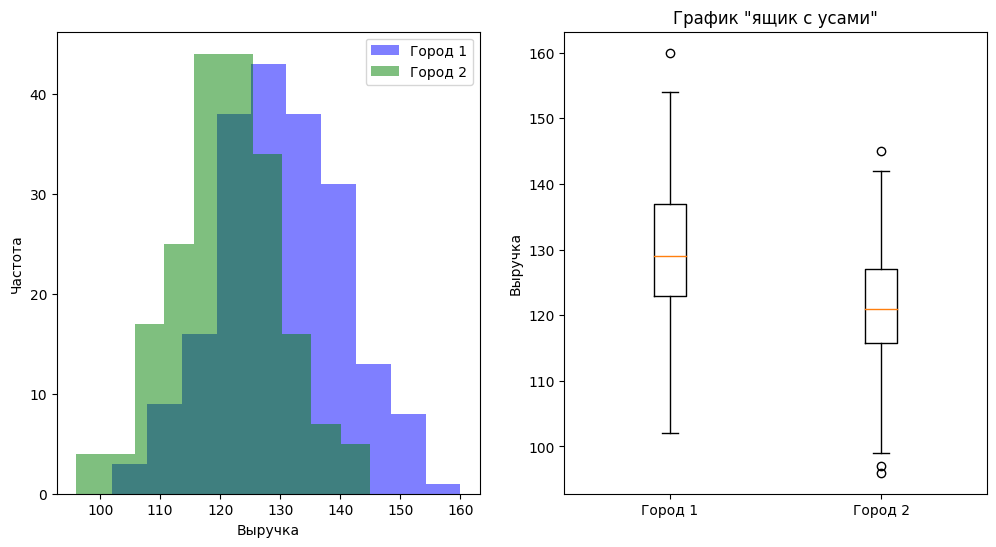

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Ваши данные о выручке в первом и втором городах (пример данных)
revenue_city1 = df.City1Aft
revenue_city2 = df.City1Bef

# Шаг 2: Вычислите средние значения выручки в каждом из городов
mean_revenue_city1 = np.mean(revenue_city1)
mean_revenue_city2 = np.mean(revenue_city2)

# Шаг 3: Проведите t-тест
t_statistic, p_value = stats.ttest_ind(revenue_city1, revenue_city2)

# Уровень значимости
alpha = 0.05

# Проверьте статистическую значимость
if p_value < alpha:
    print("Существует статистически значимая разница между средней выручкой в двух городах.")
else:
    print("Нет статистически значимой разницы между средней выручкой в двух городах.")

# Шаг 4: Постройте описательные статистики, гистограмму и график "ящик с усами"
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(revenue_city1, alpha=0.5, label='Город 1', color='blue', bins=10)
plt.hist(revenue_city2, alpha=0.5, label='Город 2', color='green', bins=10)
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot([revenue_city1, revenue_city2], labels=['Город 1', 'Город 2'])
plt.ylabel('Выручка')
plt.title('График "ящик с усами"')
plt.show()


Однако, если полученное значение p-уровня больше 0,01, мы не сможем отвергнуть нулевую гипотезу, что указывает на отсутствие достаточного статистического доказательства различий в средней выручке между городами.

Таким образом, изменение уровня значимости на 0,01 приведет к более строгим критериям для отклонения нулевой гипотезы.